In [ ]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import distplot
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Text, Web and Social Media Analytics/online_shoppers_intention.csv")
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [ ]:
df.shape

(12330, 18)

In [ ]:
df = df.dropna() 
df.shape

(12316, 18)

In [ ]:
df.describe().loc[['min','max']]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
min,0.0,-1.00,0.0,-1.000,0.0,-1.00000,0.0,0.0,0.000000,0.0,1.0,1.0,1.0,1.0
max,27.0,3398.75,24.0,2549.375,705.0,63973.52223,0.2,0.2,361.763742,1.0,8.0,13.0,9.0,20.0


In [ ]:
df = df[df['ProductRelated_Duration'] >= 0 ]
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [ ]:
df = df[df.ProductRelated_Duration < np.percentile(df.ProductRelated_Duration,99)]
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [ ]:
df.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.605419,0.357396,0.238181,0.424254,0.375205,-0.221911,-0.315549,0.100878,-0.095210,-0.004837,-0.025029,-0.000908,-0.036045,0.027396,0.132739
Administrative_Duration,0.605419,1.000000,0.256566,0.170492,0.235872,0.265545,-0.145916,-0.210130,0.072083,-0.073595,-0.006570,-0.014421,0.002460,-0.017983,0.017704,0.090919
Informational,0.357396,0.256566,1.000000,0.615658,0.330597,0.335522,-0.114550,-0.162431,0.052721,-0.044861,-0.008989,-0.039438,-0.023619,-0.039823,0.036492,0.093331
Informational_Duration,0.238181,0.170492,0.615658,1.000000,0.212554,0.245085,-0.073209,-0.105385,0.037010,-0.026817,-0.008021,-0.019214,-0.014837,-0.033825,0.029184,0.069675
ProductRelated,0.424254,0.235872,0.330597,0.212554,1.000000,0.837696,-0.233865,-0.335157,0.078322,-0.016305,0.005233,-0.013476,-0.031354,-0.050705,0.015087,0.163802
ProductRelated_Duration,0.375205,0.265545,0.335522,0.245085,0.837696,1.000000,-0.227904,-0.311896,0.081944,-0.031126,0.007559,-0.009948,-0.018393,-0.048318,0.006943,0.175516
BounceRates,-0.221911,-0.145916,-0.114550,-0.073209,-0.233865,-0.227904,1.000000,0.911274,-0.118900,0.074263,0.024876,-0.018378,-0.009296,0.081587,-0.045023,-0.149059
ExitRates,-0.315549,-0.210130,-0.162431,-0.105385,-0.335157,-0.311896,0.911274,1.000000,-0.174710,0.104155,0.015298,-0.006326,-0.011547,0.081095,-0.061360,-0.205549
PageValues,0.100878,0.072083,0.052721,0.037010,0.078322,0.081944,-0.118900,-0.174710,1.000000,-0.063979,0.018610,0.046200,0.011217,0.012442,0.012177,0.496255
SpecialDay,-0.095210,-0.073595,-0.044861,-0.026817,-0.016305,-0.031126,0.074263,0.104155,-0.063979,1.000000,0.012305,0.003695,-0.016983,0.050693,-0.017195,-0.081624


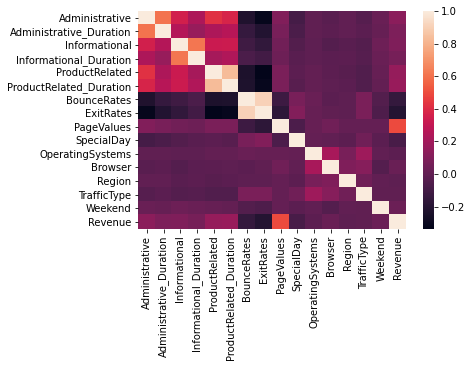

In [ ]:
sns.heatmap(df.corr())

In [ ]:
data1 = pd.get_dummies(df)
datarevenue = pd.get_dummies(df)
data1

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1,False,False,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,2,2,1,2,False,False,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,3,2,2,4,False,False,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,3,3,1,4,True,False,0,0,1,0,0,0,0,0,0,0,0,0,1
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.000000,0.0,2,2,1,3,False,False,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,4,6,1,1,True,False,0,1,0,0,0,0,0,0,0,0,0,0,1
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,3,2,1,8,True,False,0,0,0,0,0,0,0,1,0,0,0,0,1
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,3,2,1,13,True,False,0,0,0,0,0,0,0,1,0,0,0,0,1
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,2,2,3,11,False,False,0,0,0,0,0,0,0,1,0,0,0,0,1


In [ ]:
data1 = data1.drop(columns={"Revenue"})

In [ ]:
data1

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1,False,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,2,2,1,2,False,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,3,2,2,4,False,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,3,3,1,4,True,0,0,1,0,0,0,0,0,0,0,0,0,1
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.000000,0.0,2,2,1,3,False,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,4,6,1,1,True,0,1,0,0,0,0,0,0,0,0,0,0,1
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,3,2,1,8,True,0,0,0,0,0,0,0,1,0,0,0,0,1
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,3,2,1,13,True,0,0,0,0,0,0,0,1,0,0,0,0,1
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,2,2,3,11,False,0,0,0,0,0,0,0,1,0,0,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data1, datarevenue.Revenue, test_size=0.2, random_state=12)

In [ ]:
param_grid = {'min_samples_leaf': [2, 3, 4, 5], 'n_estimators': [10,50,100, 200, 300, 1000]}

In [ ]:
rf = RandomForestClassifier(random_state=12)

In [ ]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=12,
                                  

In [ ]:
y_predict = grid_search.best_estimator_.predict(X_test)

In [ ]:
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

       False       0.97      0.93      0.95      2171
        True       0.58      0.78      0.67       261

    accuracy                           0.92      2432
   macro avg       0.78      0.86      0.81      2432
weighted avg       0.93      0.92      0.92      2432



In [ ]:
grid_search.best_estimator_.feature_importances_

array([4.02126783e-02, 5.42129770e-02, 1.51367899e-02, 2.31112223e-02,
       6.77764168e-02, 8.25038153e-02, 5.06315483e-02, 8.17188132e-02,
       4.21609173e-01, 2.73525261e-03, 1.41844926e-02, 1.49566962e-02,
       2.69076611e-02, 2.69841868e-02, 8.96469108e-03, 2.28931311e-03,
       4.97172694e-03, 7.97683988e-05, 2.78266973e-03, 9.35987811e-04,
       5.19552401e-03, 7.15500701e-03, 2.25383713e-02, 2.73098629e-03,
       3.36909508e-03, 8.37495051e-03, 2.01348781e-04, 7.72883702e-03])

In [ ]:
dfnew = pd.DataFrame(columns={"feature", "value"})
dfnew["feature"] = data1.columns
dfnew["value"] = grid_search.best_estimator_.feature_importances_

In [ ]:
dfnew.sort_values("value", ascending=False).head(5)

,feature,value
8,PageValues,0.421609
5,ProductRelated_Duration,0.082504
7,ExitRates,0.081719
4,ProductRelated,0.067776
1,Administrative_Duration,0.054213
